In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
#数据清洗

In [49]:
df_titanic = pd.read_csv('titanic.csv', index_col=0)

In [50]:
print('前5个数据组\n',df_titanic.head(5))
print('后5个数据\n',df_titanic.tail(5))

前5个数据组
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
后5个数据
      survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0 

In [51]:
print('特征相关性')

特征相关性


In [52]:
new_df = df_titanic.corr()
print('矩阵特征相关度\n',new_df)

矩阵特征相关度
             survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


绘制特征相关性热力图



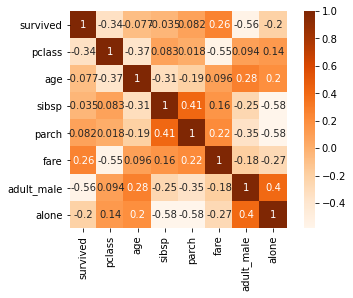

In [53]:
print('绘制特征相关性热力图\n')
import seaborn as sns
plt.figure(1)
sns.heatmap(new_df, annot=True, vmax=1, square=True, cmap='Oranges')
plt.show()

In [54]:
print('特征重要性')

特征重要性


In [55]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [56]:
print('剔除一部分特征\n')
df_mod = df_titanic.drop(['sibsp'], axis=1)
print(df_mod)

剔除一部分特征

     survived  pclass     sex   age  parch     fare embarked   class    who  \
0           0       3    male  22.0      0   7.2500        S   Third    man   
1           1       1  female  38.0      0  71.2833        C   First  woman   
2           1       3  female  26.0      0   7.9250        S   Third  woman   
3           1       1  female  35.0      0  53.1000        S   First  woman   
4           0       3    male  35.0      0   8.0500        S   Third    man   
..        ...     ...     ...   ...    ...      ...      ...     ...    ...   
886         0       2    male  27.0      0  13.0000        S  Second    man   
887         1       1  female  19.0      0  30.0000        S   First  woman   
888         0       3  female   NaN      2  23.4500        S   Third  woman   
889         1       1    male  26.0      0  30.0000        C   First    man   
890         0       3    male  32.0      0   7.7500        Q   Third    man   

     adult_male deck  embark_town alive  a

In [57]:
df_mod.dtypes

survived         int64
pclass           int64
sex             object
age            float64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [58]:
# print('数据特征缺失值补充和非整形浮点型的处理\n')
# df_mod['sex']=(df_mod['sex']=='male').astype('float')
# df_mod['age']=df_mod['age'].fillna(df_mod['age'].mean())
# labels=df_mod['embarked'].unique().tolist()
# df_mod['embarked']=df_mod['embarked'].apply(lambda x:labels.index(x))
# df_mod.fillna(0)

In [59]:
print('尝试pd.factorize\n')
df_mod['sex'] = pd.factorize(df_mod['sex'])[0].astype(np.int64)
df_mod['class'] = pd.factorize(df_mod['class'])[0].astype(np.int64)

尝试pd.factorize



In [60]:
df_mod.dtypes

survived         int64
pclass           int64
sex              int64
age            float64
parch            int64
fare           float64
embarked        object
class            int64
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [61]:
df_mod.head(3)

,survived,pclass,sex,age,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,0,7.2500,S,0,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,0,71.2833,C,1,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,7.9250,S,0,woman,False,NaN,Southampton,yes,True


In [62]:
print('删去不需要的特征\n')
df_mod1 = df_mod[['survived', 'pclass', 'sex', 'age', 'parch', 'fare', 'class']]

删去不需要的特征



In [63]:
print(df_mod1.head(5))
print(df_mod1.dtypes)
df_mod1['age']=df_mod1['age'].fillna(df_mod1['age'].mean())
print('判断是否有NAN值\n',df_mod1.isnull().any())


   survived  pclass  sex   age  parch     fare  class
0         0       3    0  22.0      0   7.2500      0
1         1       1    1  38.0      0  71.2833      1
2         1       3    1  26.0      0   7.9250      0
3         1       1    1  35.0      0  53.1000      1
4         0       3    0  35.0      0   8.0500      0
survived      int64
pclass        int64
sex           int64
age         float64
parch         int64
fare        float64
class         int64
dtype: object
判断是否有NAN值
 survived    False
pclass      False
sex         False
age         False
parch       False
fare        False
class       False
dtype: bool


d:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
print(df_mod1)

     survived  pclass  sex        age  parch     fare  class
0           0       3    0  22.000000      0   7.2500      0
1           1       1    1  38.000000      0  71.2833      1
2           1       3    1  26.000000      0   7.9250      0
3           1       1    1  35.000000      0  53.1000      1
4           0       3    0  35.000000      0   8.0500      0
..        ...     ...  ...        ...    ...      ...    ...
886         0       2    0  27.000000      0  13.0000      2
887         1       1    1  19.000000      0  30.0000      1
888         0       3    1  29.699118      2  23.4500      0
889         1       1    0  26.000000      0  30.0000      1
890         0       3    0  32.000000      0   7.7500      0

[891 rows x 7 columns]


In [74]:
print('训练数据以及测试数据\n')
x = df_mod1.iloc[:, df_mod1.columns != 'survived']
y = df_mod1.iloc[:, df_mod1.columns == 'survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

训练数据以及测试数据



In [75]:
print(y_test.head(3))
print(x_train.head(3))

     survived
298         1
384         0
356         1
     pclass  sex   age  parch     fare  class
571       1    1  53.0      0  51.4792      1
96        1    0  71.0      0  34.6542      1
617       3    1  26.0      0  16.1000      0


In [76]:
#classify tree modoul

In [77]:
clf = DecisionTreeClassifier(random_state=15)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print('评分\n', score)

评分
 0.7761194029850746


In [78]:
importance = clf.feature_importances_

In [80]:
print('特征重要性\n', importance)

特征重要性
 [0.10565385 0.28187058 0.29670228 0.02034797 0.28833687 0.00708846]


In [91]:
print('数据的特征名称\n')
lables = list(x_train.columns)
print(lables)

数据的特征名称

['pclass', 'sex', 'age', 'parch', 'fare', 'class']


In [81]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10565
Feature: 1, Score: 0.28187
Feature: 2, Score: 0.29670
Feature: 3, Score: 0.02035
Feature: 4, Score: 0.28834
Feature: 5, Score: 0.00709


将特征重要性可视化



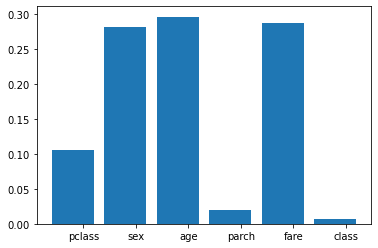

In [94]:
print('将特征重要性可视化\n')
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([index + 0.2 for index in range(len(lables))], lables) #添加特征标签
plt.show()